In [1]:
# Import required libaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import seaborn as sb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Import the dataset
df = pd.read_csv('RESOURCES/diabetes_data.csv')
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Checking information on the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [4]:
# Discover the numerical information on the given data for futher knowledge about it.


df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#checking null values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [6]:
# checking the unique values
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Age,13
Sex,2
HighChol,2
CholCheck,2
BMI,80
Smoker,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


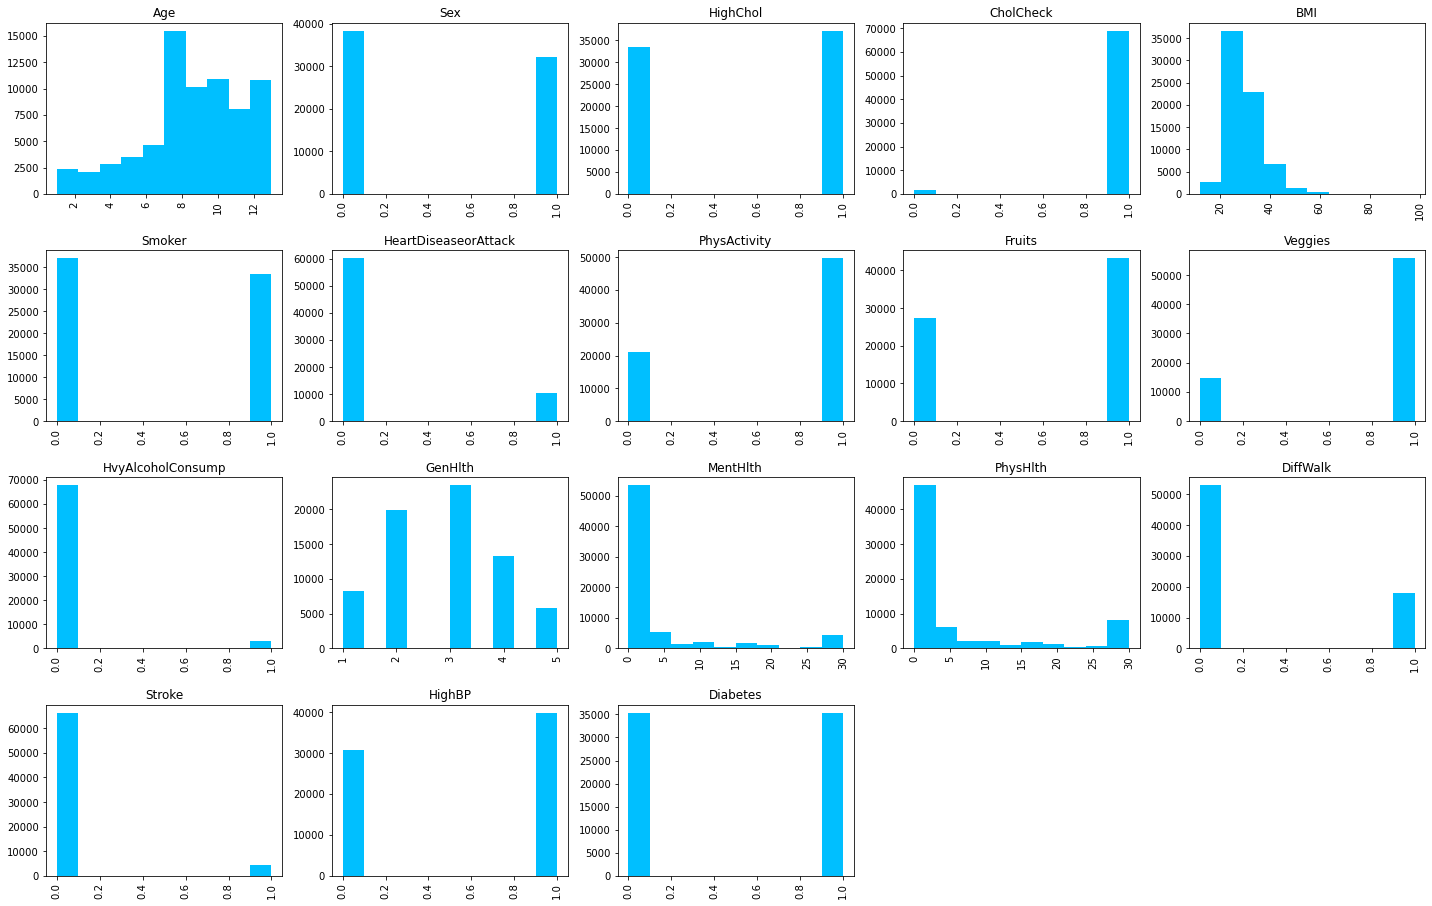

In [7]:
#check frequency of all values in the column

# All data columns except for color
feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(20,25))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

In [8]:
# Find out the columns
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [9]:
#Assign the variable for column
cols=['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Diabetes', 'HighBP', 'Stroke']

Presenting the countplots for categorical features
------------------------------Age------------------------------


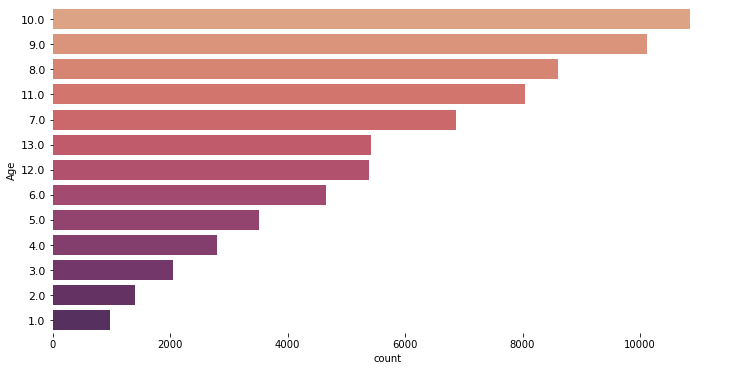

------------------------------Sex------------------------------


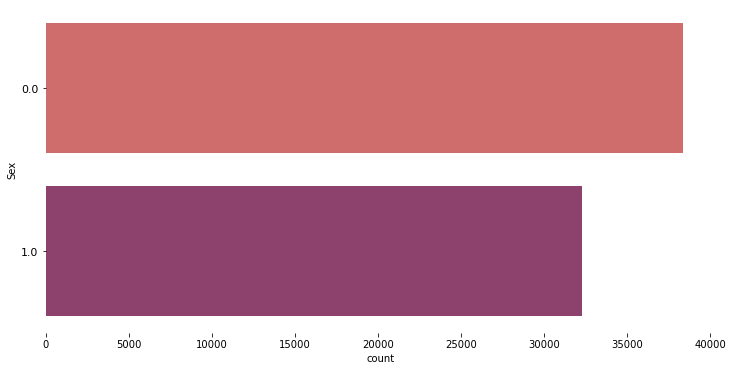

------------------------------HighChol------------------------------


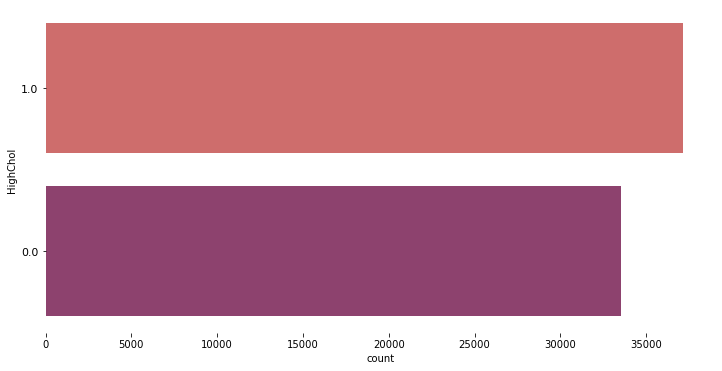

------------------------------CholCheck------------------------------


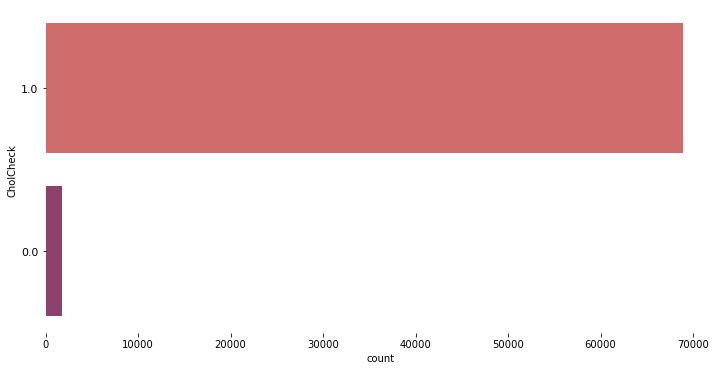

------------------------------Smoker------------------------------


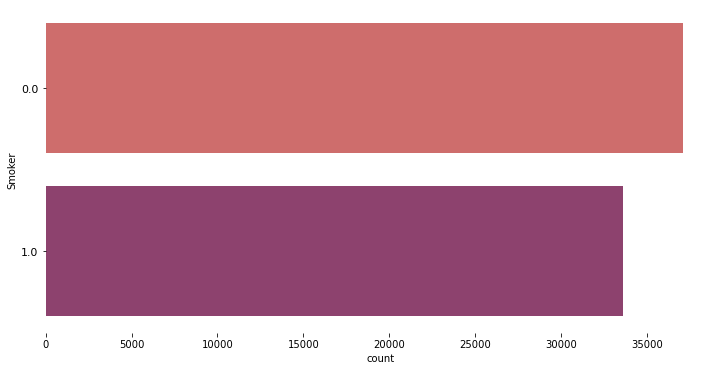

------------------------------HeartDiseaseorAttack------------------------------


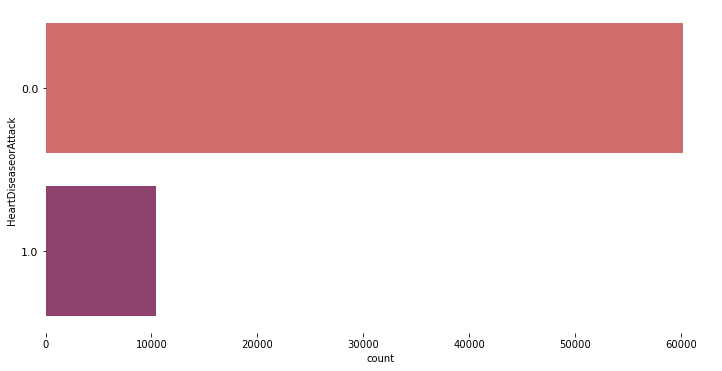

------------------------------PhysActivity------------------------------


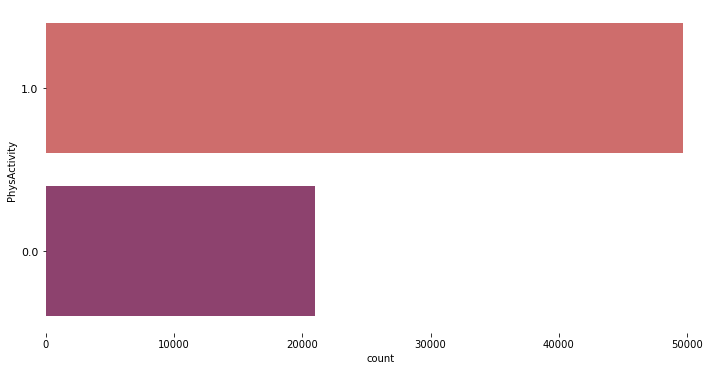

------------------------------Fruits------------------------------


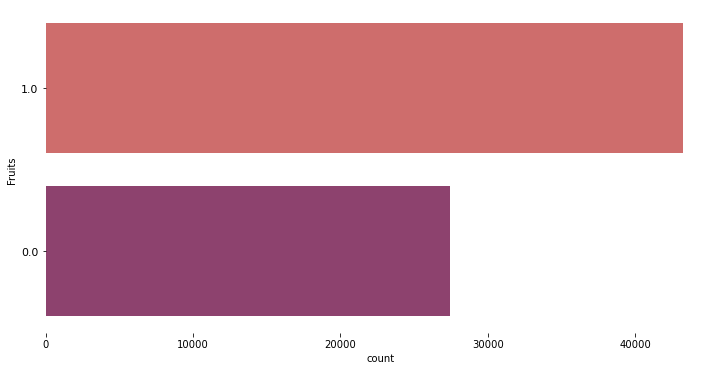

------------------------------Veggies------------------------------


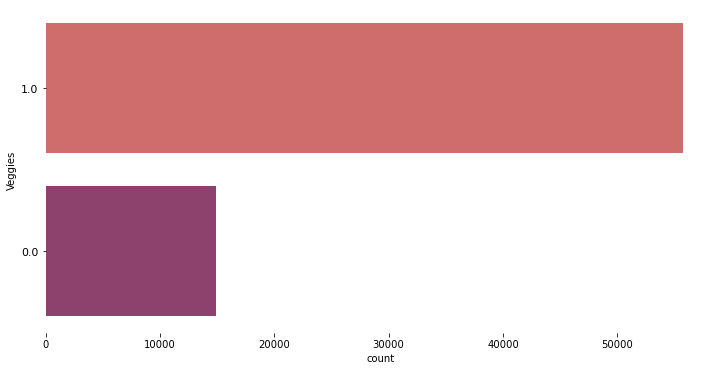

------------------------------HvyAlcoholConsump------------------------------


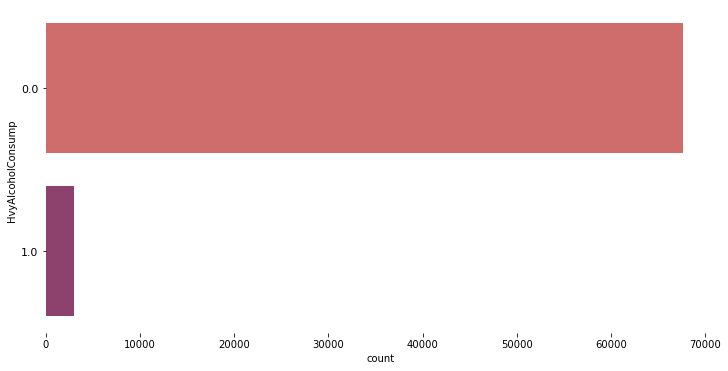

------------------------------GenHlth------------------------------


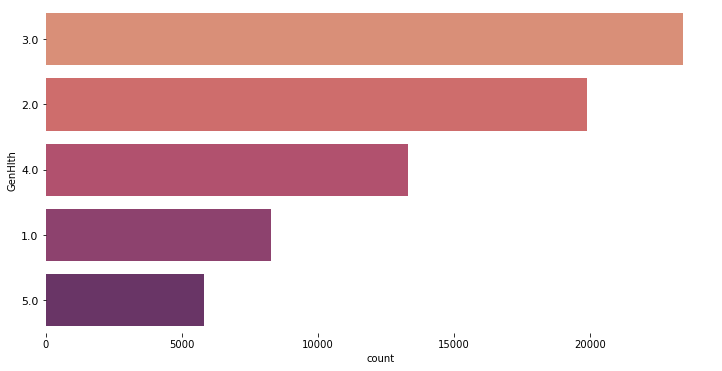

------------------------------DiffWalk------------------------------


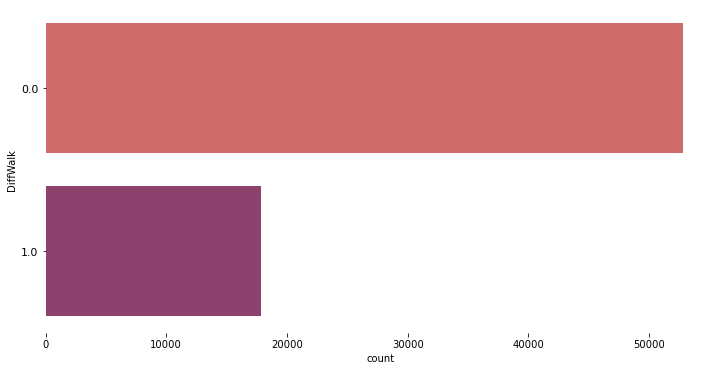

------------------------------Diabetes------------------------------


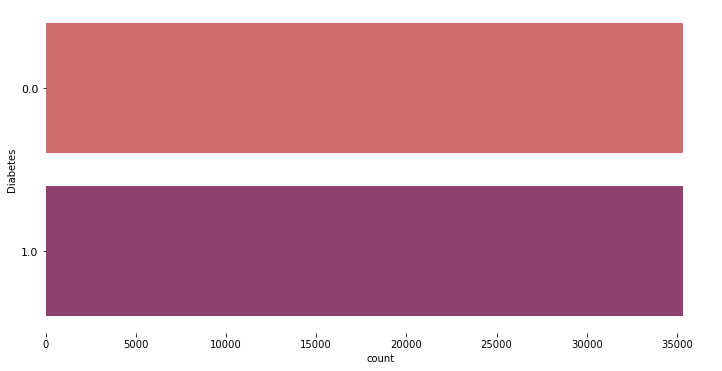

------------------------------HighBP------------------------------


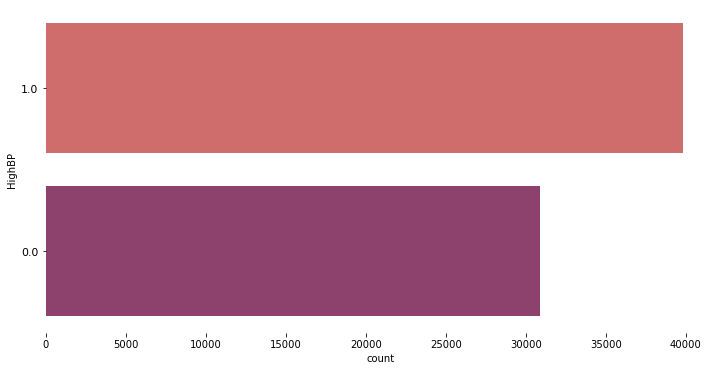

------------------------------Stroke------------------------------


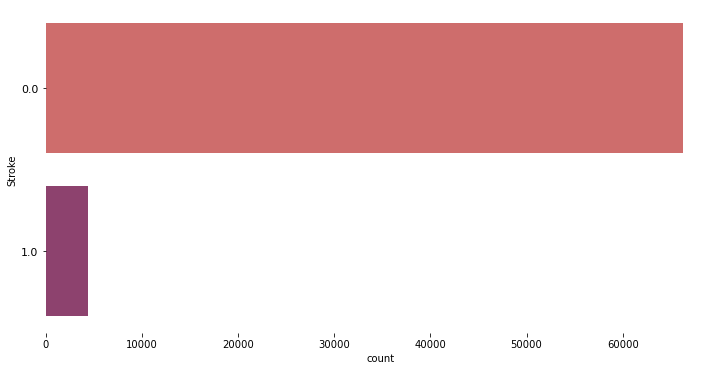

In [10]:
# plot the bar using seaborn libary for quick visualisaiton.

print("Presenting the countplots for categorical features")
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(12, 6))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='flare')
  plt.ylabel(i)
  plt.yticks(fontsize=11)
  print(f'------------------------------{i}------------------------------')
  plt.box()
  plt.show()

It can be seen that features like CholCheck and HvyAlcoholConsump are heavily unbalanced and may skew or introduce bias in the model thus they will not be considered while building the model.

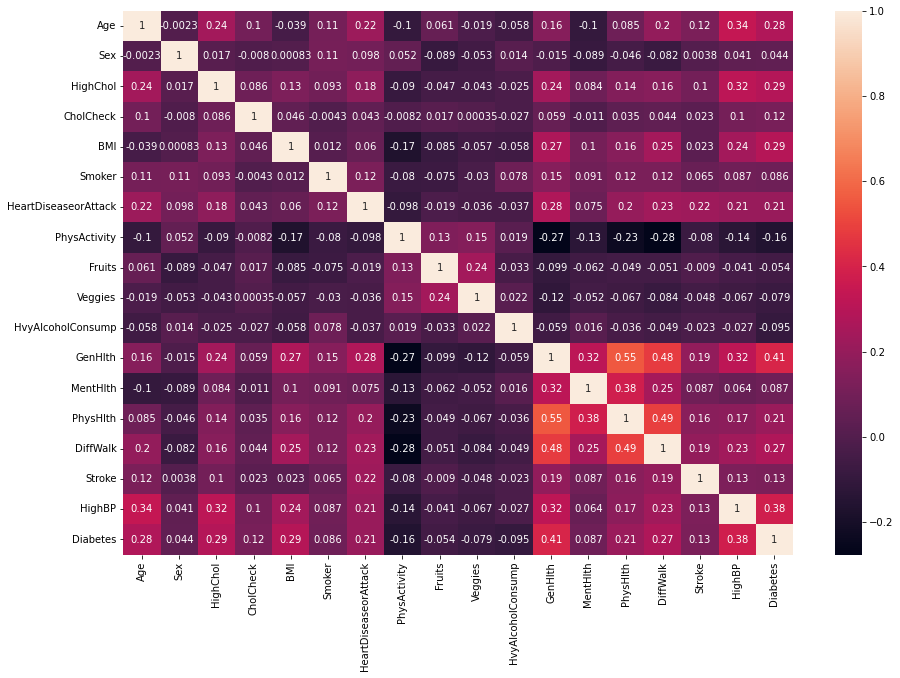

In [11]:
# Quick look at the 'corelation' between all the given dependencies.
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
#dropping features that are not required
data=df.drop(['Stroke','HvyAlcoholConsump','MentHlth',],axis=1)
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,3.0,30.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,1.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,3.0,3.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0


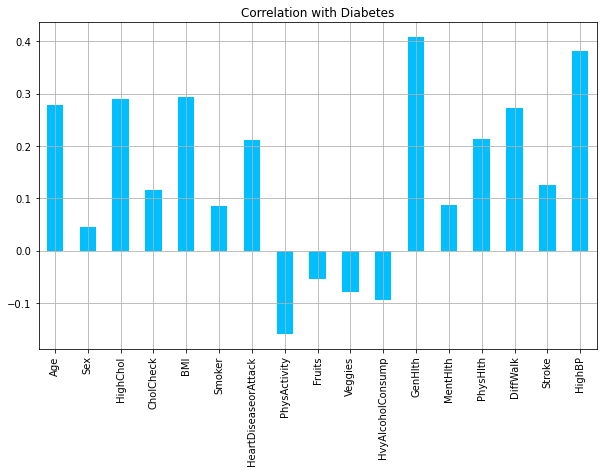

In [13]:
#check correlation of other columns with diabetes column
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue");

Data transformation

In [14]:
#Check skewness
#can only be checked for numeric data

df_skew = df[['Age','BMI','PhysHlth']]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.545923,False
BMI,1.719180,True
PhysHlth,1.657304,True


BMI and PhysHealth are skewed, it needs to be transformed

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [16]:
#Scaling the data for features selection using the MinMaxScaler method.
#only numeric variables apply here

mms = MinMaxScaler()
df[['BMI']] = mms.fit_transform(df[['BMI']])
df[['Age']] = mms.fit_transform(df[['Age']])
df[['PhysHlth']] = mms.fit_transform(df[['PhysHlth']])
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.250000,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,1.000000,0.0,0.0,1.0,0.0
1,0.916667,1.0,1.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.000000,0.0,1.0,1.0,0.0
2,1.000000,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.333333,0.0,0.0,0.0,0.0
3,0.833333,1.0,1.0,1.0,0.186047,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.100000,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.0,1.0,0.197674,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [17]:
df.shape

(70692, 18)

DATA MODELLING : RANDOM FOREST

In [18]:
#splitting the data into input data features and target 
X=df.drop('Diabetes',axis=1)
y=df['Diabetes']

In [19]:

# Separate the features and the target variable
X = df.drop('Diabetes', axis=1)  # Features
y =df['Diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the training data
rf_classifier = rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)




Model Evalution

In [20]:
# Create the dataframe for prediction and reality.
predictions = rf_classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1.0,1.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,1.0
5,1.0,0.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, y_pred)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4902,2188
Actual 1,1671,5378


Accuracy Score : 0.7270669778626494
Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      7090
         1.0       0.71      0.76      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139



In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_classifier.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True)

[(0.2096621294785364, 'BMI'),
 (0.15355429486363947, 'Age'),
 (0.11306895706815187, 'GenHlth'),
 (0.09687700309110228, 'HighBP'),
 (0.08869511633028179, 'PhysHlth'),
 (0.06844902176746435, 'MentHlth'),
 (0.04209230583295384, 'HighChol'),
 (0.03400070682671115, 'Fruits'),
 (0.0336922870988289, 'Smoker'),
 (0.03116626916268739, 'Sex'),
 (0.027207004037049207, 'PhysActivity'),
 (0.02633962668099734, 'Veggies'),
 (0.025778915921207575, 'DiffWalk'),
 (0.019854204227227615, 'HeartDiseaseorAttack'),
 (0.011881906130853813, 'Stroke'),
 (0.01090932775842453, 'HvyAlcoholConsump'),
 (0.006770923723882325, 'CholCheck')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

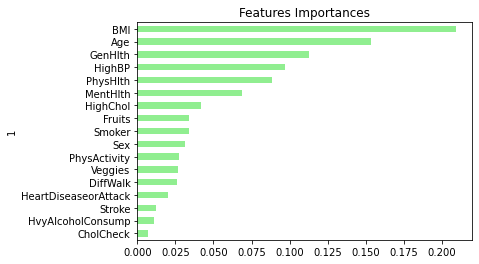

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

DATA MODELING : DECISSION TREE

In [25]:

# Separate the features and the target variable
X = df.drop('Diabetes', axis=1)  # Features
y = df['Diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier using the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Create the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


Accuracy: 0.6586038616592405
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.67      7090
         1.0       0.66      0.64      0.65      7049

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139



DATA MODELLING : KNEIGHBORS

In [26]:


# Separate the features and the target variable
X = df.drop('Diabetes', axis=1)  # Features
y = df['Diabetes']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Specify the number of neighbors

# Train the classifier using the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Create the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy: 0.7037272791569418
              precision    recall  f1-score   support

         0.0       0.72      0.67      0.69      7090
         1.0       0.69      0.74      0.71      7049

    accuracy                           0.70     14139
   macro avg       0.70      0.70      0.70     14139
weighted avg       0.70      0.70      0.70     14139



Data Modeling Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separate the features and the target variable
X = df.drop('Diabetes', axis=1)  # Features
y = df['Diabetes']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)


# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.7414951552443596
              precision    recall  f1-score   support

         0.0       0.78      0.67      0.72      7090
         1.0       0.71      0.81      0.76      7049

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139

